In [31]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import fiona

# set working directory
os.chdir('/Users/Naif Khaled/Documents/GitHub/COGCC-Risk-Analysis/Data')

In [32]:
data = pd.read_excel('flowlines_to_spills_mod1.xlsx')

In [33]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OPERATOR_NUM         735 non-null    int64  
 1   LOCATION_ID          735 non-null    int64  
 2   LOCATION_TYPE        735 non-null    object 
 3   FACILITY_NAME        735 non-null    object 
 4   FLOWLINE_ID          732 non-null    float64
 5   FLOWLINE_TYPE        735 non-null    object 
 6   ENDEQUIPTYPE         735 non-null    object 
 7   TYPEOFSTARTLOCATION  735 non-null    object 
 8   STARTEQUIPTYPE       735 non-null    object 
 9   Line Age             735 non-null    float64
 10  PIPEMATERIAL         735 non-null    object 
 11  MAXOD                735 non-null    float64
 12  TYPEOFFLUIDTRANS     735 non-null    object 
 13  Risk                 735 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 80.5+ KB
None
(735, 14)


# Dataset


In [34]:
data.describe()

,OPERATOR_NUM,LOCATION_ID,FLOWLINE_ID,Line Age,MAXOD
count,735.000000,735.000000,732.000000,735.000000,735.000000
mean,25676.508844,411385.853061,466455.741803,24.446575,3.453784
std,22945.347195,67213.972776,7407.089083,15.272864,2.910454
min,7125.000000,159844.000000,455244.000000,4.369863,1.000000
25%,10459.000000,321505.000000,461024.750000,13.035616,2.000000
50%,10633.000000,448669.000000,461755.500000,18.131507,2.375000
75%,46290.000000,460789.500000,474833.250000,39.104110,3.000000
max,100322.000000,479291.000000,480500.000000,69.487671,16.000000


In [35]:
print(data)

     OPERATOR_NUM  LOCATION_ID          LOCATION_TYPE  \
0           74165       322147  Production Facilities   
1           74165       322147  Production Facilities   
2           46290       446484  Production Facilities   
3           10633       446484  Production Facilities   
4           46290       446484  Production Facilities   
..            ...          ...                    ...   
730         39560       319065  Production Facilities   
731         39560       319065  Production Facilities   
732         39560       319065  Production Facilities   
733         35080       443145  Production Facilities   
734         39560       318928  Production Facilities   

                           FACILITY_NAME  FLOWLINE_ID  FLOWLINE_TYPE  \
0    SARTI-66S63W                            473951.0  Wellhead Line   
1    SARTI-66S63W                            473951.0  Wellhead Line   
2    GRANT                                   471657.0  Wellhead Line   
3    GRANT                 

# Turning text columns into numbers

In [41]:
data_transformed = pd.get_dummies(data, columns=['OPERATOR_NUM', 'LOCATION_ID', 'LOCATION_TYPE', 'FACILITY_NAME', 'FLOWLINE_ID', 'FLOWLINE_TYPE', 'ENDEQUIPTYPE', 'TYPEOFSTARTLOCATION', 'STARTEQUIPTYPE', 'PIPEMATERIAL', 'TYPEOFFLUIDTRANS'])

for col in data_transformed.columns:
    if pd.api.types.is_numeric_dtype(data_transformed[col]):
        data_transformed[col] = data_transformed[col].astype(int)
    else:
        # Handle or report non-numeric columns
        print(f"Column {col} is not numeric.")

data_transformed['Risk'] = data_transformed['Risk'].map({'H': 1, 'M/L': 0})

print(data_transformed)

Column Risk is not numeric.
     Line Age  MAXOD  Risk  OPERATOR_NUM_7125  OPERATOR_NUM_8960  \
0          46      3     1                  0                  0   
1          46      3     1                  0                  0   
2          45      3     1                  0                  0   
3          45      3     1                  0                  0   
4          45      3     1                  0                  0   
..        ...    ...   ...                ...                ...   
730        11      2     0                  0                  0   
731        41      2     0                  0                  0   
732        41      2     0                  0                  0   
733         6      3     0                  0                  0   
734        41      3     0                  0                  0   

     OPERATOR_NUM_10017  OPERATOR_NUM_10071  OPERATOR_NUM_10112  \
0                     0                   0                   0   
1                    

# Some Visualizations

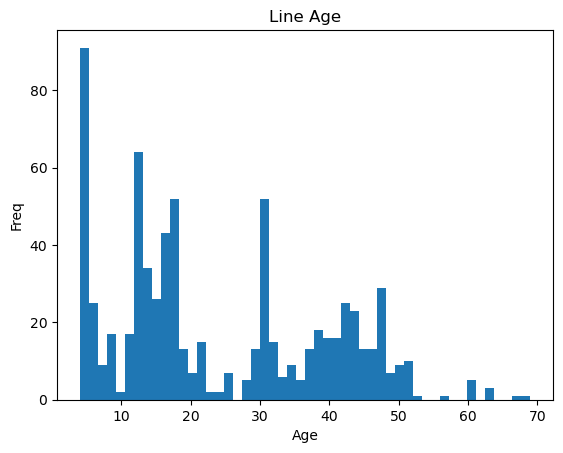

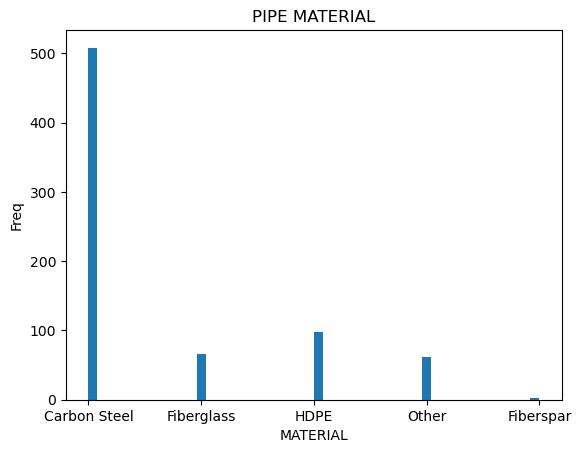

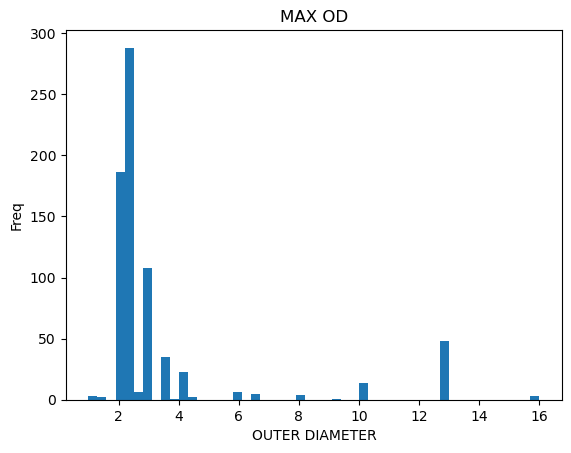

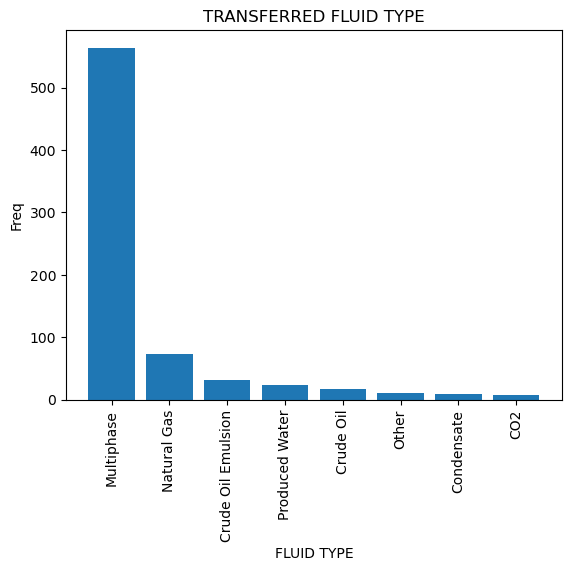

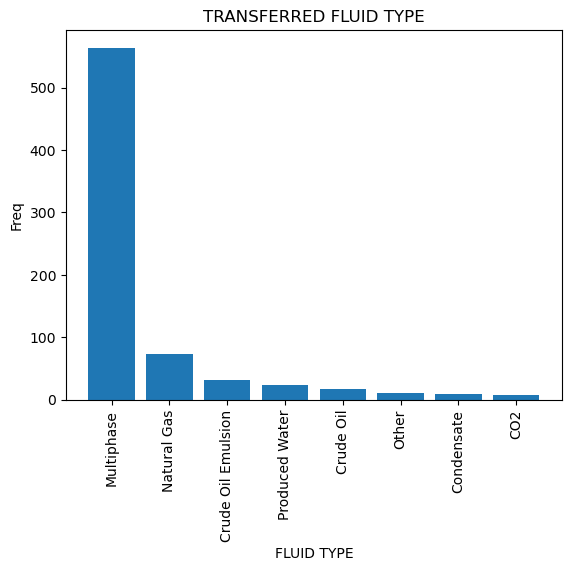

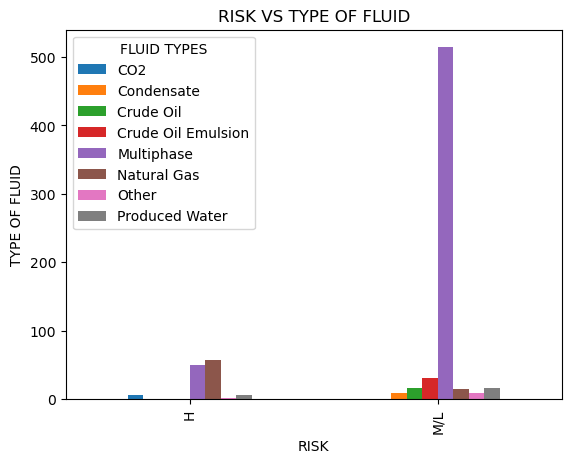

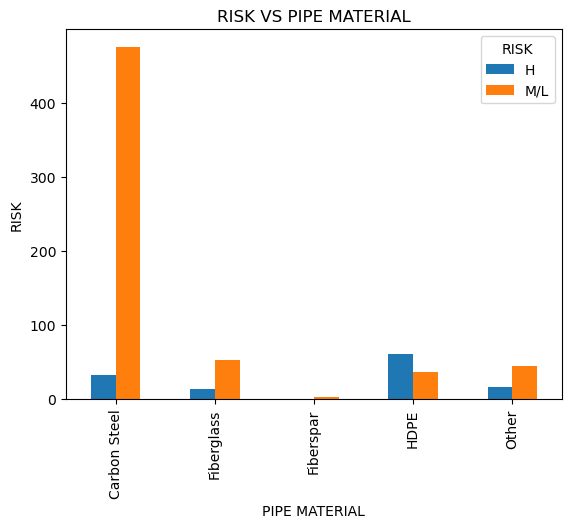

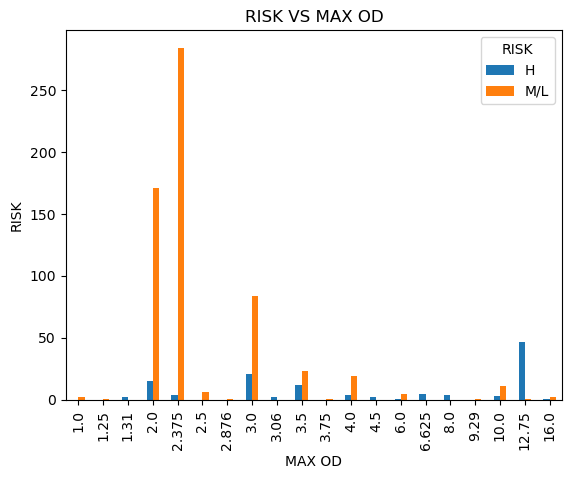

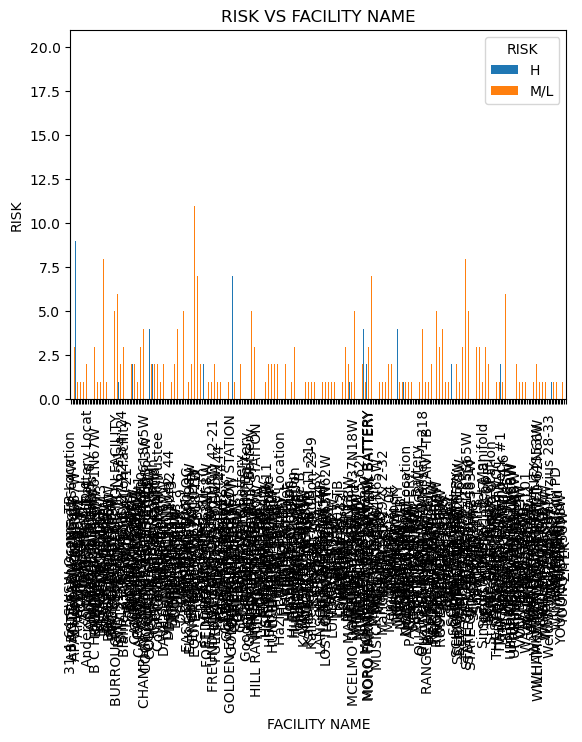

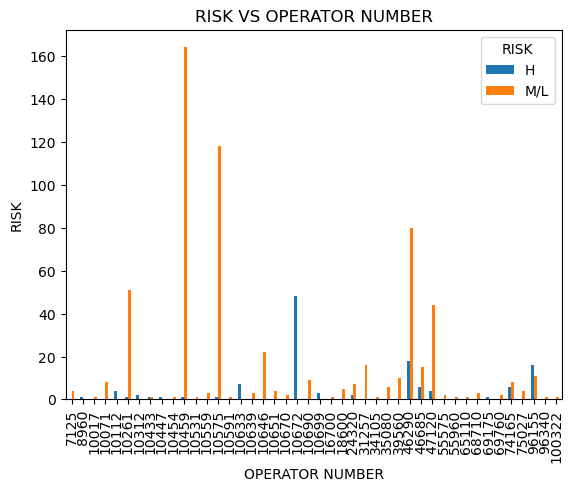

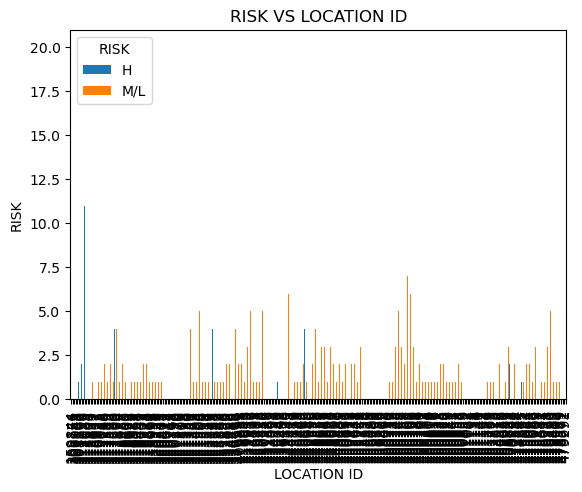

In [42]:
plt.hist(data_transformed['Line Age'], bins=50)
plt.xlabel('Age'); plt.ylabel('Freq'); plt.title('Line Age')
plt.show()

plt.hist(data['PIPEMATERIAL'], bins=50)
plt.xlabel('MATERIAL'); plt.ylabel('Freq'); plt.title('PIPE MATERIAL')
plt.show()

plt.hist(data['MAXOD'], bins=50)
plt.xlabel('OUTER DIAMETER'); plt.ylabel('Freq'); plt.title('MAX OD')
plt.show()


category_counts = data['TYPEOFFLUIDTRANS'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('FLUID TYPE')
plt.ylabel('Freq')
plt.title('TRANSFERRED FLUID TYPE')
plt.xticks(rotation=90) 
plt.show()



category_counts = data['TYPEOFFLUIDTRANS'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('FLUID TYPE')
plt.ylabel('Freq')
plt.title('TRANSFERRED FLUID TYPE')
plt.xticks(rotation=90) 
plt.show()




counts = data.groupby(['Risk', 'TYPEOFFLUIDTRANS']).size().reset_index(name='counts')
pivot_counts = counts.pivot(index='Risk', columns='TYPEOFFLUIDTRANS', values='counts')

pivot_counts.plot(kind='bar', stacked=False)
plt.xlabel('RISK')
plt.ylabel('TYPE OF FLUID') 
plt.title('RISK VS TYPE OF FLUID') 
plt.legend(title='FLUID TYPES')
plt.show()

counts = data.groupby(['PIPEMATERIAL', 'Risk']).size().reset_index(name='counts')
pivot_counts = counts.pivot(index='PIPEMATERIAL', columns='Risk', values='counts')

pivot_counts.plot(kind='bar', stacked=False)
plt.xlabel('PIPE MATERIAL')
plt.ylabel('RISK') 
plt.title('RISK VS PIPE MATERIAL') 
plt.legend(title='RISK')
plt.show()



counts = data.groupby(['MAXOD', 'Risk']).size().reset_index(name='counts')
pivot_counts = counts.pivot(index='MAXOD', columns='Risk', values='counts')

pivot_counts.plot(kind='bar', stacked=False)
plt.xlabel('MAX OD')
plt.ylabel('RISK') 
plt.title('RISK VS MAX OD') 
plt.legend(title='RISK')
plt.show()


counts = data.groupby(['FACILITY_NAME', 'Risk']).size().reset_index(name='counts')
pivot_counts = counts.pivot(index='FACILITY_NAME', columns='Risk', values='counts')

pivot_counts.plot(kind='bar', stacked=False)
plt.xlabel('FACILITY NAME')
plt.ylabel('RISK') 
plt.title('RISK VS FACILITY NAME') 
plt.legend(title='RISK')
plt.show()

counts = data.groupby(['OPERATOR_NUM', 'Risk']).size().reset_index(name='counts')
pivot_counts = counts.pivot(index='OPERATOR_NUM', columns='Risk', values='counts')

pivot_counts.plot(kind='bar', stacked=False)
plt.xlabel('OPERATOR NUMBER')
plt.ylabel('RISK') 
plt.title('RISK VS OPERATOR NUMBER') 
plt.legend(title='RISK')
plt.show()

counts = data.groupby(['LOCATION_ID', 'Risk']).size().reset_index(name='counts')
pivot_counts = counts.pivot(index='LOCATION_ID', columns='Risk', values='counts')

pivot_counts.plot(kind='bar', stacked=False)
plt.xlabel('LOCATION ID')
plt.ylabel('RISK') 
plt.title('RISK VS LOCATION ID') 
plt.legend(title='RISK')
plt.show()


# Machine Learning Models (Non-Transformed Data)

In [54]:
inputs = data_transformed.drop('Risk', axis=1)
target = data_transformed['Risk']

from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(inputs, target, test_size = 0.3)

X = np.asarray(trainX)
y = np.asarray(trainY)
testX = np.asarray(testX)
testY = np.asarray(testY)

# 1-Logistic Regression

C:\Users\Naif Khaled\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.9366515837104072


C:\Users\Naif Khaled\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Naif Khaled\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

F1 Scores:  [0.89361702 0.7        0.60465116 0.81818182 0.875     ]
F1 Scores Mean 0.7782900004498223
F1 Scores STD:  0.11002206413422921


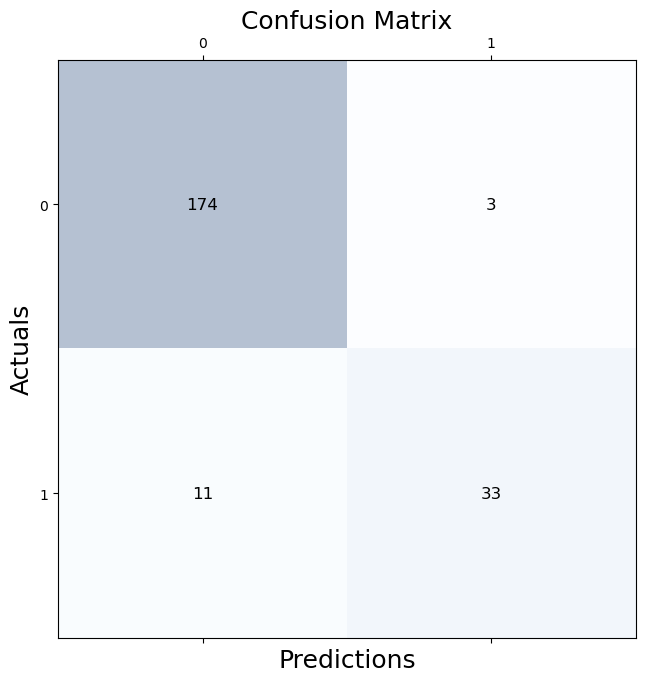

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       177
           1       0.92      0.75      0.83        44

    accuracy                           0.94       221
   macro avg       0.93      0.87      0.89       221
weighted avg       0.94      0.94      0.93       221



In [55]:
import sklearn as sk
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report, make_scorer
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

#create a model object
model = linear_model.LogisticRegression()
model.fit(X, y)

#train the model
y_hat = model.predict(testX)

#evaluate the model
accuracy = model.score(testX, testY)
print('Accuracy: ', accuracy)

#setup to get f-score and cross validation
scorerVar = make_scorer(f1_score, pos_label=1)

scores = cross_val_score(model, inputs, target, cv = StratifiedKFold(n_splits=5, shuffle=True), scoring=scorerVar)
print('F1 Scores: ', scores)
print('F1 Scores Mean', scores.mean())
print('F1 Scores STD: ', scores.std())

#confusion matrix
conf_matrix = sk.metrics.confusion_matrix(testY, model.predict(testX))
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#classification report
print(classification_report(testY, model.predict(testX)))

# 2-K-Nearest Neigbor

0.9095022624434389


C:\Users\Naif Khaled\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Naif Khaled\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\Naif Khaled\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Naif Khaled\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Naif Khaled\anaconda3\Lib\site-packages\sklearn\utils\_response.py", line 85, in _get_response_values
    y_pred = prediction_method(X)
             ^^^^^^^^^^^^^^^^^^^^
  File 

[nan nan nan nan nan]
nan
nan


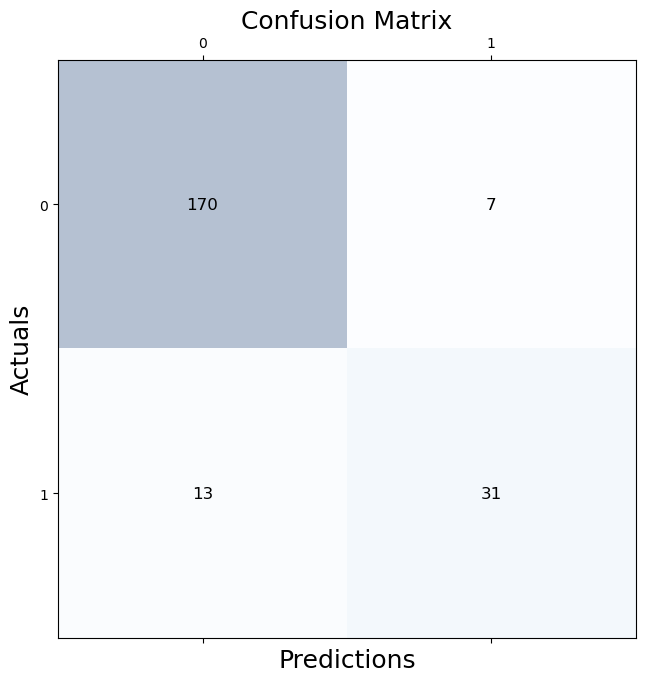

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       177
           1       0.82      0.70      0.76        44

    accuracy                           0.91       221
   macro avg       0.87      0.83      0.85       221
weighted avg       0.91      0.91      0.91       221



In [57]:


from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

k = 5
model = neighbors.KNeighborsClassifier(k)
model.fit(X,y)

y_hat = model.predict(testX)

accuracy = model.score(testX, testY)
print(accuracy)


#Cross Validation
scorerVar = make_scorer(f1_score, pos_label=1)

scores = cross_val_score(model, inputs, target, cv = StratifiedKFold(n_splits=5, shuffle=True), scoring=scorerVar)
print(scores)
print(scores.mean())
print(scores.std())

#Confusion Matrix
conf_matrix = sk.metrics.confusion_matrix(testY, model.predict(testX))
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#Classification Report
print(classification_report(testY, model.predict(testX)))

# 3-Support Vector Machine

Accuracy:  0.8868778280542986
F1 Scores:  [0.73170732 0.61111111 0.68421053 0.7027027  0.61111111]
F1 Scores Mean 0.668168553662777
F1 Scores STD:  0.04898618232380862


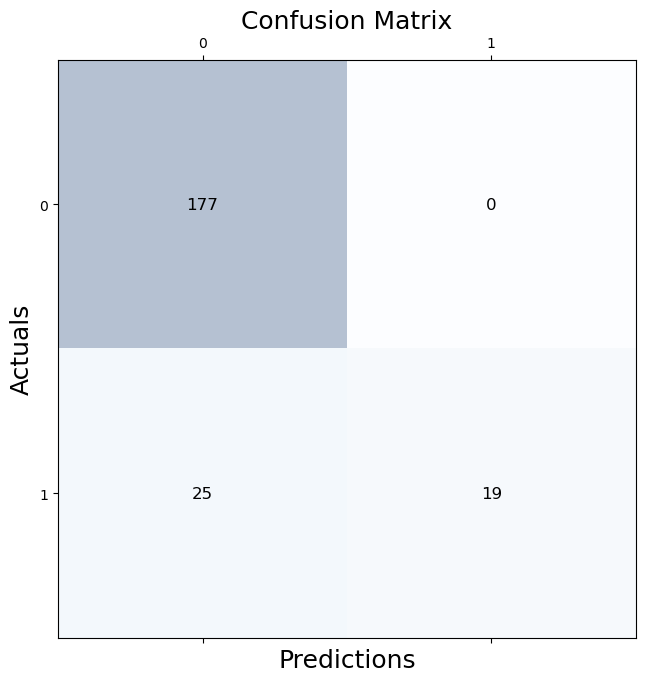

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       177
           1       1.00      0.43      0.60        44

    accuracy                           0.89       221
   macro avg       0.94      0.72      0.77       221
weighted avg       0.90      0.89      0.87       221



In [58]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

#create a model object

model = svm.SVC(kernel='rbf', C=10)
model.fit(X, y)

#train our model
y_hat = model.predict(testX)


#evaluate the model
accuracy = model.score(testX, testY)
print('Accuracy: ', accuracy)

#setup to get f-score and cv
scorerVar = make_scorer(f1_score, pos_label=1)

scores = cross_val_score(model, inputs, target, cv = StratifiedKFold(n_splits=5, shuffle=True), scoring=scorerVar)
print('F1 Scores: ', scores)
print('F1 Scores Mean', scores.mean())
print('F1 Scores STD: ', scores.std())

#confusion matrix

conf_matrix = sk.metrics.confusion_matrix(testY, model.predict(testX))
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#classification report
print(classification_report(testY, model.predict(testX)))

# Ensemble Models

# 1- Gradient Boosting Decision Trees

Accuracy:  0.918552036199095
F1 Scores:  [0.84615385 0.92307692 0.84444444 0.7804878  0.7027027 ]
F1 Scores Mean:  0.8193731442511931
F1 Scores STD:  0.07378931003851319


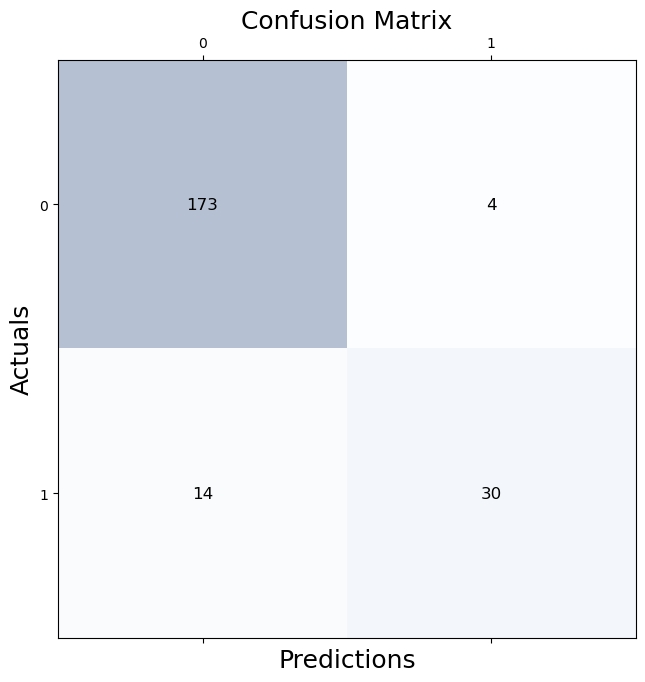

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       177
           1       0.88      0.68      0.77        44

    accuracy                           0.92       221
   macro avg       0.90      0.83      0.86       221
weighted avg       0.92      0.92      0.91       221



In [59]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Create a Gradient Boosting model object
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

# Train the model on the training data
model.fit(X, y)

# Make predictions on the test data
y_hat = model.predict(testX)

# Evaluate the model
accuracy = model.score(testX, testY)
print('Accuracy: ', accuracy)

# Setup to get F-score and Cross-validation scores
scorerVar = make_scorer(f1_score, pos_label=1)

scores = cross_val_score(model, inputs, target, cv=StratifiedKFold(n_splits=5, shuffle=True), scoring=scorerVar)
print('F1 Scores: ', scores)
print('F1 Scores Mean: ', scores.mean())
print('F1 Scores STD: ', scores.std())

# Confusion matrix
conf_matrix = confusion_matrix(testY, y_hat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Classification report
print(classification_report(testY, y_hat))


# 2-AdaBoost

Accuracy:  0.9366515837104072
F1 Scores:  [0.91666667 0.85106383 0.89361702 0.8372093  0.89795918]
F1 Scores Mean:  0.8793032007459095
F1 Scores STD:  0.030060998317262375


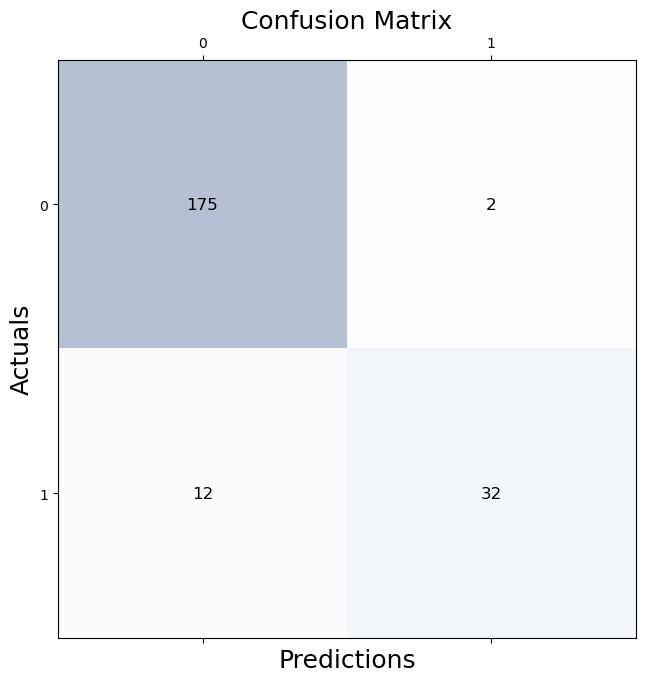

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       177
           1       0.94      0.73      0.82        44

    accuracy                           0.94       221
   macro avg       0.94      0.86      0.89       221
weighted avg       0.94      0.94      0.93       221



In [60]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Create an AdaBoost model object
model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=0)

# Train the model on the training data
model.fit(X, y)

# Make predictions on the test data
y_hat = model.predict(testX)

# Evaluate the model
accuracy = model.score(testX, testY)
print('Accuracy: ', accuracy)

# Setup to get F-score and Cross-validation scores
scorerVar = make_scorer(f1_score, pos_label=1)

scores = cross_val_score(model, inputs, target, cv=StratifiedKFold(n_splits=5, shuffle=True), scoring=scorerVar)
print('F1 Scores: ', scores)
print('F1 Scores Mean: ', scores.mean())
print('F1 Scores STD: ', scores.std())

# Confusion matrix
conf_matrix = confusion_matrix(testY, y_hat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Classification report
print(classification_report(testY, y_hat))


# 3-Random Forests

Accuracy:  0.9411764705882353
F1 Scores:  [0.93877551 0.74418605 0.91304348 0.88888889 0.7826087 ]
F1 Scores Mean:  0.8535005239035284
F1 Scores STD:  0.0762165721595782


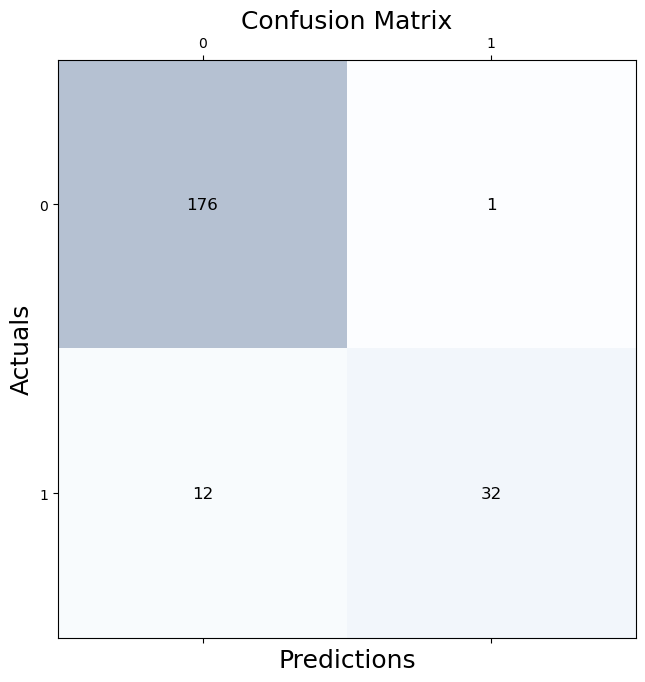

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       177
           1       0.97      0.73      0.83        44

    accuracy                           0.94       221
   macro avg       0.95      0.86      0.90       221
weighted avg       0.94      0.94      0.94       221



In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Create a Random Forest model object
model = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model on the training data
model.fit(X, y)

# Make predictions on the test data
y_hat = model.predict(testX)

# Evaluate the model
accuracy = model.score(testX, testY)
print('Accuracy: ', accuracy)

# Setup to get F-score and Cross-validation scores
scorerVar = make_scorer(f1_score, pos_label=1)

scores = cross_val_score(model, inputs, target, cv=StratifiedKFold(n_splits=5, shuffle=True), scoring=scorerVar)
print('F1 Scores: ', scores)
print('F1 Scores Mean: ', scores.mean())
print('F1 Scores STD: ', scores.std())

# Confusion matrix
conf_matrix = confusion_matrix(testY, y_hat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Classification report
print(classification_report(testY, y_hat))


# ML Models (PCA Dimensionality Reduction)

Explained variance ratio: [0.94833704 0.02784119]
Total explained variance ratio: 0.9761782321871781
Accuracy:  0.8868778280542986
F1 Scores:  [0.60465116 0.37837838 0.59459459 0.57894737 0.68421053]
F1 Scores Mean: 0.5681564061001025
F1 Scores STD: 0.10161845164100147


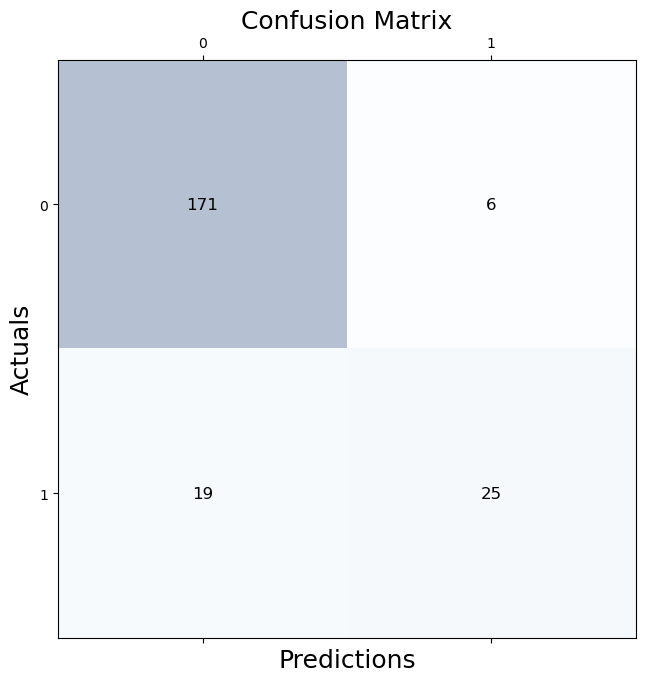

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       177
           1       0.81      0.57      0.67        44

    accuracy                           0.89       221
   macro avg       0.85      0.77      0.80       221
weighted avg       0.88      0.89      0.88       221



In [67]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report, make_scorer
import matplotlib.pyplot as plt
import sklearn as sk

# Split the data
inputs = data_transformed.drop('Risk', axis=1)
target = data_transformed['Risk']
trainX, testX, trainY, testY = train_test_split(inputs, target, test_size=0.3, random_state=42)

# Define PCA with 6 components
pca = PCA(n_components=2)

# Create a logistic regression model
logistic = LogisticRegression(max_iter=1000)

# Create a pipeline
model = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# Train the model
model.fit(trainX, trainY)

# Print the explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance ratio:", sum(pca.explained_variance_ratio_))

# Predictions
y_hat = model.predict(testX)

# Evaluate the model
accuracy = model.score(testX, testY)
print('Accuracy: ', accuracy)

# Setup to get F-score and cross-validation scores
scorerVar = make_scorer(f1_score, pos_label=1)
scores = cross_val_score(model, inputs, target, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=scorerVar)
print('F1 Scores: ', scores)
print('F1 Scores Mean:', scores.mean())
print('F1 Scores STD:', scores.std())

# Confusion matrix
conf_matrix = confusion_matrix(testY, y_hat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Classification report
print(classification_report(testY, y_hat))


# 2-K-Nearest Neighbor

Accuracy:  0.8461538461538461
F1 Scores:  [0.69565217 0.59459459 0.625      0.65217391 0.71428571]
F1 Scores Mean: 0.6563412791673662
F1 Scores STD: 0.044079926912091935


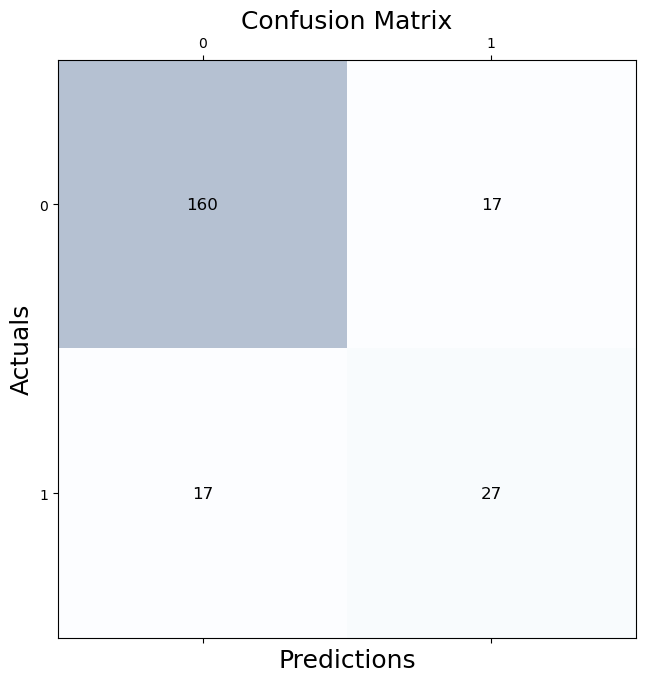

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       177
           1       0.61      0.61      0.61        44

    accuracy                           0.85       221
   macro avg       0.76      0.76      0.76       221
weighted avg       0.85      0.85      0.85       221



In [70]:
pca = PCA(n_components=2)

# Create a K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)

# Create a pipeline
model = Pipeline(steps=[('pca', pca), ('knn', knn)])

# Train the model
model.fit(trainX, trainY)

# Predictions
y_hat = model.predict(testX)

# Evaluate the model
accuracy = model.score(testX, testY)
print('Accuracy: ', accuracy)

# Setup to get F-score and cross-validation scores
scorerVar = make_scorer(f1_score, pos_label=1)
scores = cross_val_score(model, inputs, target, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=scorerVar)
print('F1 Scores: ', scores)
print('F1 Scores Mean:', scores.mean())
print('F1 Scores STD:', scores.std())

# Confusion matrix
conf_matrix = confusion_matrix(testY, y_hat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Classification report
print(classification_report(testY, y_hat))

# 3-Support Vector Machine

Accuracy:  0.8868778280542986
F1 Scores:  [0.59459459 0.42424242 0.55555556 0.61111111 0.66666667]
F1 Scores Mean: 0.5704340704340705
F1 Scores STD: 0.08135408135408133


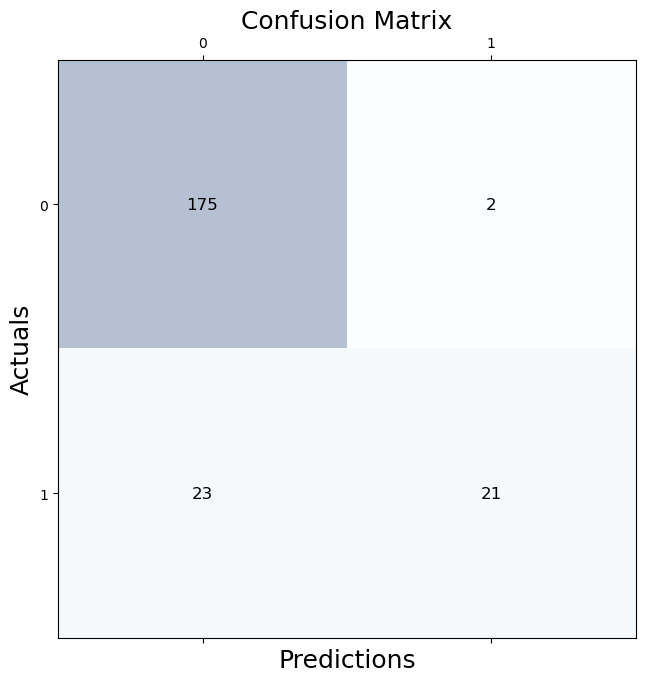

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       177
           1       0.91      0.48      0.63        44

    accuracy                           0.89       221
   macro avg       0.90      0.73      0.78       221
weighted avg       0.89      0.89      0.87       221



In [72]:
# Define PCA with 2 components
pca = PCA(n_components=2)

# Create a Support Vector Machine model
svm = SVC(kernel='rbf', C=1.0)

# Create a pipeline
model = Pipeline(steps=[('pca', pca), ('svm', svm)])

# Train the model
model.fit(trainX, trainY)

# Predictions
y_hat = model.predict(testX)

# Evaluate the model
accuracy = model.score(testX, testY)
print('Accuracy: ', accuracy)

# Setup to get F-score and cross-validation scores
scorerVar = make_scorer(f1_score, pos_label=1)
scores = cross_val_score(model, inputs, target, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=scorerVar)
print('F1 Scores: ', scores)
print('F1 Scores Mean:', scores.mean())
print('F1 Scores STD:', scores.std())

# Confusion matrix
conf_matrix = confusion_matrix(testY, y_hat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Classification report
print(classification_report(testY, y_hat))


Accuracy:  0.9276018099547512
F1 Scores:  [0.75       0.55       0.52941176 0.61111111 0.7027027 ]
F1 Scores Mean: 0.6286451157039392
F1 Scores STD: 0.08550004400705366


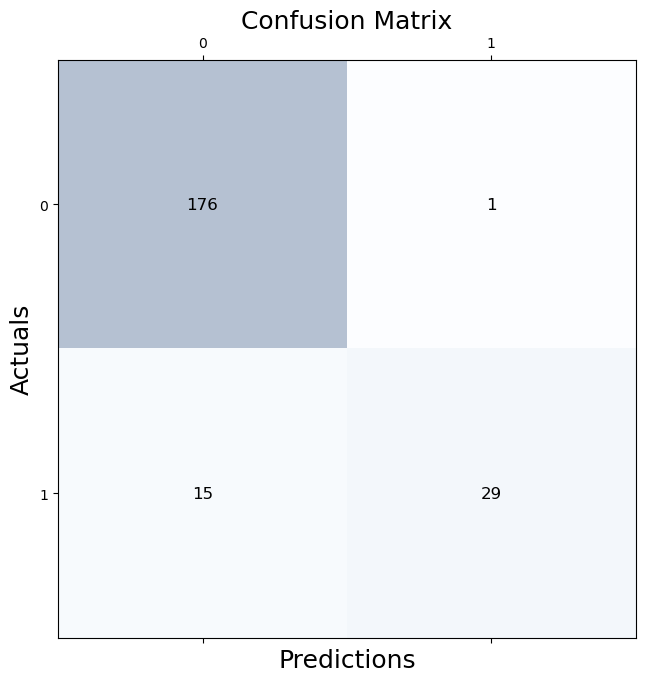

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       177
           1       0.97      0.66      0.78        44

    accuracy                           0.93       221
   macro avg       0.94      0.83      0.87       221
weighted avg       0.93      0.93      0.92       221



In [73]:
# Define PCA with 6 components
pca = PCA(n_components=2)

# Create a Gradient Boosting classifier
gbdt = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

# Create a pipeline
model = Pipeline(steps=[('pca', pca), ('gbdt', gbdt)])

# Train the model
model.fit(trainX, trainY)

# Predictions
y_hat = model.predict(testX)

# Evaluate the model
accuracy = model.score(testX, testY)
print('Accuracy: ', accuracy)

# Setup to get F-score and cross-validation scores
scorerVar = make_scorer(f1_score, pos_label=1)
scores = cross_val_score(model, inputs, target, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=scorerVar)
print('F1 Scores: ', scores)
print('F1 Scores Mean:', scores.mean())
print('F1 Scores STD:', scores.std())

# Confusion matrix
conf_matrix = confusion_matrix(testY, y_hat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Classification report
print(classification_report(testY, y_hat))


# AdaBoost

Accuracy:  0.9230769230769231
F1 Scores:  [0.60465116 0.56410256 0.69767442 0.72727273 0.69767442]
F1 Scores Mean: 0.6582750582750582
F1 Scores STD: 0.06262472090390529


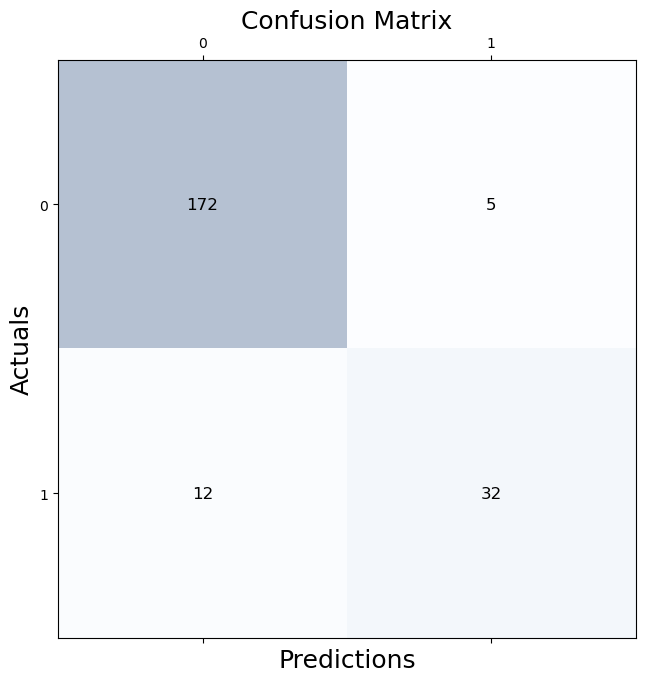

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       177
           1       0.86      0.73      0.79        44

    accuracy                           0.92       221
   macro avg       0.90      0.85      0.87       221
weighted avg       0.92      0.92      0.92       221



In [74]:
# Define PCA with 2 components
pca = PCA(n_components=2)

# Create an AdaBoost classifier
# The default base estimator is DecisionTreeClassifier initialized with max_depth=1
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=0)

# Create a pipeline
model = Pipeline(steps=[('pca', pca), ('adaboost', adaboost)])

# Train the model
model.fit(trainX, trainY)

# Predictions
y_hat = model.predict(testX)

# Evaluate the model
accuracy = model.score(testX, testY)
print('Accuracy: ', accuracy)

# Setup to get F-score and cross-validation scores
scorerVar = make_scorer(f1_score, pos_label=1)
scores = cross_val_score(model, inputs, target, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=scorerVar)
print('F1 Scores: ', scores)
print('F1 Scores Mean:', scores.mean())
print('F1 Scores STD:', scores.std())

# Confusion matrix
conf_matrix = confusion_matrix(testY, y_hat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Classification report
print(classification_report(testY, y_hat))


# Random Forests

Accuracy:  0.9140271493212669
F1 Scores:  [0.89795918 0.71111111 0.79166667 0.73913043 0.80851064]
F1 Scores Mean: 0.7896756069063458
F1 Scores STD: 0.06451550224333398


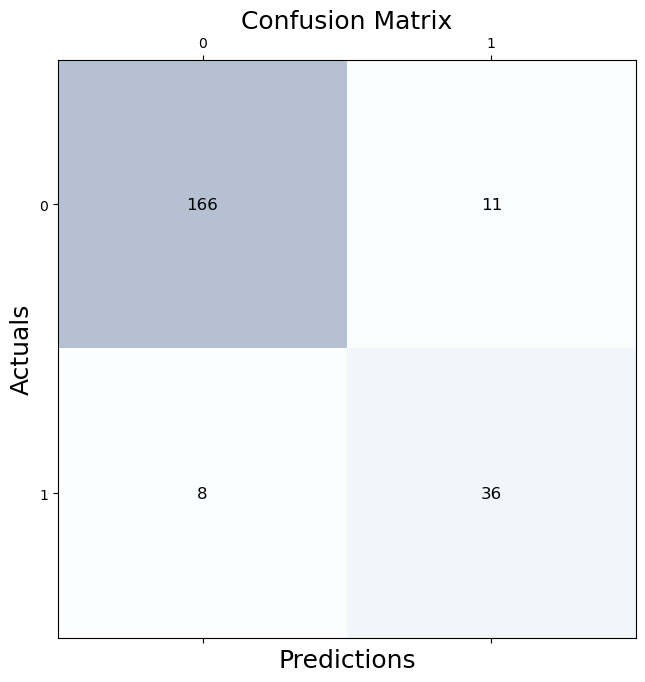

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       177
           1       0.77      0.82      0.79        44

    accuracy                           0.91       221
   macro avg       0.86      0.88      0.87       221
weighted avg       0.92      0.91      0.92       221



In [75]:
# Define PCA with 2 components
pca = PCA(n_components=2)

# Create a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)

# Create a pipeline
model = Pipeline(steps=[('pca', pca), ('random_forest', random_forest)])

# Train the model
model.fit(trainX, trainY)

# Predictions
y_hat = model.predict(testX)

# Evaluate the model
accuracy = model.score(testX, testY)
print('Accuracy: ', accuracy)

# Setup to get F-score and cross-validation scores
scorerVar = make_scorer(f1_score, pos_label=1)
scores = cross_val_score(model, inputs, target, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=scorerVar)
print('F1 Scores: ', scores)
print('F1 Scores Mean:', scores.mean())
print('F1 Scores STD:', scores.std())

# Confusion matrix
conf_matrix = confusion_matrix(testY, y_hat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Classification report
print(classification_report(testY, y_hat))


# ML Models (Other Dimensionality Reduction Methods) [Future Work]